# MyND Offline Processing: Data Analysis
Author: Geeling Chau<br> 
<br>
Description: PSD Trends<br>
Sources: 
- Ollie's Segment Speller Offline Processing Code https://github.com/ollie-d/SegSpeller/blob/master/Offline%20Processing.ipynb 
- neurodsp https://github.com/neurodsp-tools/neurodsp
- FOOOF https://fooof-tools.github.io/fooof/index.html 
- PyEEG http://pyeeg.sourceforge.net/ 


## Imports

In [1]:
from helperFunctions import *
from constants import *
from dataAnalysisFunctions import *

from neurodsp.plts.spectral import *

import warnings
warnings.filterwarnings('ignore')

## Data imports

In [2]:
filename_foldername_dict_path = "../data/most_currently_updated.pickle"
filename_foldername_dict = loadPickle(filename_foldername_dict_path)

foldername= filename_foldername_dict["foldername"]
filename=filename_foldername_dict["filename"]
print(foldername, filename)

dataframe_directory = "../data/dataframe/"+foldername+"/"
dataframe_path = dataframe_directory+filename+".pickle"

df = loadPickle(dataframe_path)

P001 part_P001_block_S004


In [3]:
incorporate_matlab_data = False
if incorporate_matlab_data: 
    filtered_matlab_data_directory = "../data/filtered_matlab_data/"+foldername+"/"
    filtered_matlab_data_path = filtered_matlab_data_directory+filename+".pickle"
    filtered_matlab_data = loadPickle(filtered_matlab_data_path)
    all_data = filtered_matlab_data
    data_type = "data_matlab_extended"
else :
    filtered_cleaned_data_directory = "../data/filtered_cleaned_data/"+foldername+"/"
    filtered_cleaned_data_path = filtered_cleaned_data_directory+filename+".pickle"
    filtered_cleaned_data = loadPickle(filtered_cleaned_data_path)
    all_data = filtered_cleaned_data
    data_type = "data_extended"

In [4]:
# Create a binning interval
binning=list(np.arange(.5, 30, 2))
intervals = getIntervals(binning)

In [5]:
df.head()

,data_index,data,data_extended,is_target,is_pressed,has_letters_shown,has_meme,time,points,reaction_time,section_number,looking_up,looking_right,trial_time,word_length
0,0,"{'aux': {'time': [988.999909591776, 989.000117...","{'aux': {'time': [988.4972506704805, 988.49752...",True,False,False,False,988.995118,-1,0.000000,1,0,0,1.0,8
1,1,"{'aux': {'time': [990.0137349623215, 990.01392...","{'aux': {'time': [989.5172514059926, 989.51752...",True,True,False,False,990.011403,1,0.140599,1,0,0,1.0,6
2,2,"{'aux': {'time': [991.026037240875, 991.026244...","{'aux': {'time': [990.5233463885796, 990.52371...",False,False,False,False,991.022748,0,0.000000,1,0,0,1.0,3
3,3,"{'aux': {'time': [992.0462132503861, 992.05411...","{'aux': {'time': [991.5444450500859, 991.54470...",False,False,False,False,992.039946,0,0.000000,1,0,0,1.0,4
4,4,"{'aux': {'time': [993.0597070669332, 993.05994...","{'aux': {'time': [992.557575367635, 992.557852...",False,False,False,False,993.056975,0,0.000000,1,0,0,1.0,10


In [6]:


unfocused_df = df[df["trial_time"] > 0.9 ] # df[df["is_target"] == False ] #df[((df["is_pressed"] == False) & (df["is_target"] == True))]
#unfocused_data = unfocused_df[data_type].values
#unfocused_windows = getWindowsList(unfocused_df, data_type=data_type)
unfocused_freqs, unfocused_psds, unfocused_psd_avg = getFreqsAndPSD(tidyEEGList(getEEGFromDataFrame_AvgLeftRight(unfocused_df, data_type=data_type)))
unfocused_psd_sem = getSEM(np.log(unfocused_psds))
print("num unfocsed", len(unfocused_df))

focused_df =  df[df["trial_time"] == 0.7 ] # df[df["is_target"] == True ] #df[((df["is_pressed"] == True) & (df["is_target"] == True))]
#focused_data = focused_df[data_type].values
#focused_windows = getWindowsList(focused_df, data_type=data_type)
focused_freqs, focused_psds, focused_psd_avg = getFreqsAndPSD(tidyEEGList(getEEGFromDataFrame_AvgLeftRight(focused_df, data_type=data_type))) 
focused_psd_sem = getSEM(np.log(focused_psds))
print("num focsed", len(focused_df))



num unfocsed 201
num focsed 298


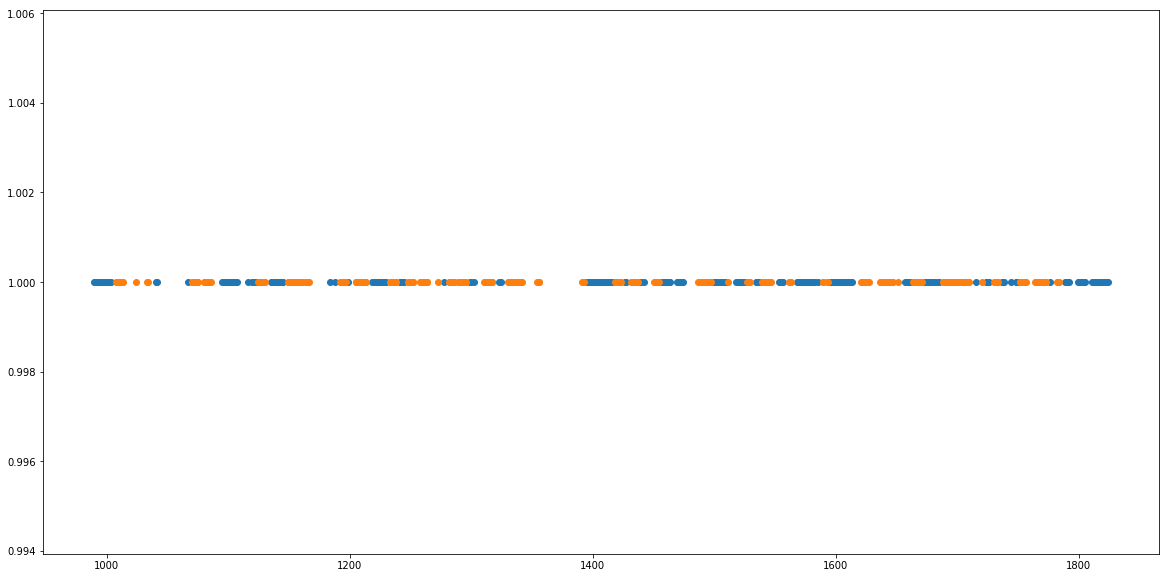

In [7]:
plt.figure(figsize=(20,10))

plt.scatter(unfocused_df["time"].values, [1] * len(unfocused_df))
plt.scatter(focused_df["time"].values, [1] * len(focused_df))

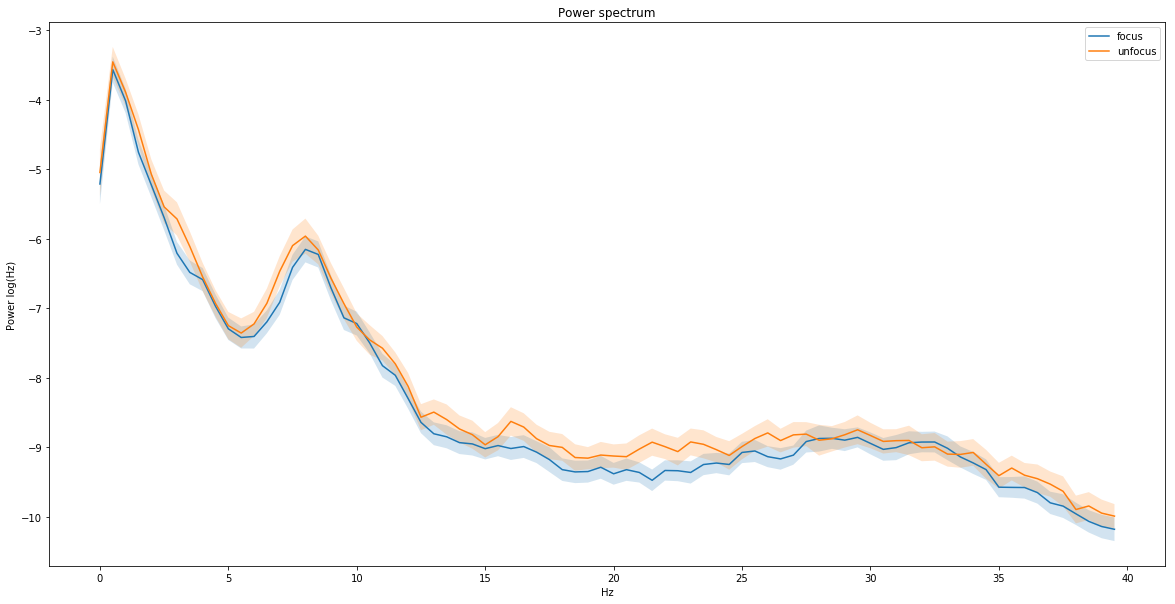

num focus 298 num unfocus 201


In [8]:
# Plot Focus vs Unfocus PSDs

# Specify the size of the window size to plot 
plot_window_size = 80

plt.figure(figsize=(20,10))

freq1 = focused_freqs[:plot_window_size]
psd1 = np.log(focused_psd_avg[:plot_window_size])
sem1 = focused_psd_sem[:plot_window_size]

plt.plot(freq1, psd1, label="focus")
plt.fill_between(freq1, psd1-sem1, psd1+sem1, alpha = 0.2)

freq2 = unfocused_freqs[:plot_window_size]
psd2 = np.log(unfocused_psd_avg[:plot_window_size])
sem2 = unfocused_psd_sem[:plot_window_size]

plt.plot(freq2, psd2, label="unfocus")
plt.fill_between(freq2, psd2-sem2, psd2+sem2, alpha = 0.2)

plt.legend()
plt.title("Power spectrum")
plt.xlabel("Hz")
plt.ylabel("Power log(Hz)")
plt.show()

print("num focus", len(focused_df), "num unfocus", len(unfocused_df))

In [9]:
# Super Focus code
'''
super_focused_df = df[((df["is_pressed"] == True) & (df["is_target"] == True) & (df["has_meme"] == True))]
#super_focused_data = super_focused_df[data_type].values
#super_focused_windows = getWindowsList(super_focused_df, data_type=data_type)
super_focused_freqs, super_focused_psds, super_focused_psd_avg = getFreqsAndPSD(tidyEEGList(getEEGFromDataFrame_AvgLeftRight(super_focused_df, data_type=data_type))) 
super_focused_psd_sem = getSEM(np.log(super_focused_psds))



super_unfocused_df = df[((df["is_pressed"] == False) & (df["is_target"] == True) & (df["has_meme"] == True))]
#super_unfocused_data = super_unfocused_df[data_type].values
#super_unfocused_windows = getWindowsList(super_unfocused_df, data_type=data_type)
super_unfocused_freqs, super_unfocused_psds, super_unfocused_psd_avg = getFreqsAndPSD(tidyEEGList(getEEGFromDataFrame_AvgLeftRight(super_unfocused_df, data_type=data_type))) 
super_unfocused_psd_sem = getSEM(np.log(super_unfocused_psds))


mispress_df = df[((df["is_pressed"] == True) & (df["is_target"] == False))]
#mispress_data = mispress_df[data_type].values
#mispress_windows = getWindowsList(mispress_df, data_type=data_type)
mispress_freqs, mispress_psds, mispress_psd_avg = getFreqsAndPSD(tidyEEGList(getEEGFromDataFrame_AvgLeftRight(mispress_df, data_type=data_type))) 
mispress_psd_sem = getSEM(np.log(mispress_psds))''';

'''freq1 = super_focused_freqs[:plot_window_size]
psd1 = np.log(super_focused_psd_avg[:plot_window_size])
sem1 = super_focused_psd_sem[:plot_window_size]

plt.plot(freq1, psd1, label="super focus")
plt.fill_between(freq1, psd1-sem1, psd1+sem1, alpha = 0.2)

freq2 = super_unfocused_freqs[:plot_window_size]
psd2 = np.log(super_unfocused_psd_avg[:plot_window_size])
sem2 = super_unfocused_psd_sem[:plot_window_size]

plt.plot(freq2, psd2, label="super unfocus")
plt.fill_between(freq2, psd2-sem2, psd2+sem2, alpha = 0.2)

plt.legend()
plt.title("Power spectrum")
plt.xlabel("Hz")
plt.ylabel("Power log(Hz)")
plt.show()

print("num focus", len(super_focused_df), "num unfocus", len(super_unfocused_df))''';